<a href="https://colab.research.google.com/github/NaomiMunyiri/Compiler-Construction-Labs/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

122193 Naomi Munyiri; 121276 Julie Yego; 115384 Moses Kinoti; 123699 Chelsea Owiti; 122946 Lucy Nelima

**FLEX**

flex (fast lexical analyzer generator) is a tool for generating scanners: programs which recognize lexical patterns in text. It is used together with Berkeley Yacc parser generator or GNU Bison parser generator. flex reads the given input files (or its standard input if no file names are given) for a description of the scanner to generate.


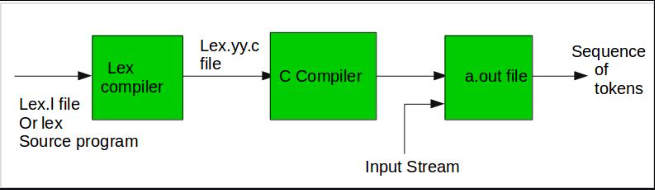

Below is a flex program to display hello world

In [ ]:
%{

#undef yywrap
#define yywrap() 1

%}

%%

[\n] {
	printf("Hello World\n");	
}

	
%%

main()
{
	yylex(); //calling the rules section
}

**BISON**

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR) parser employing LALR (1) parser tables

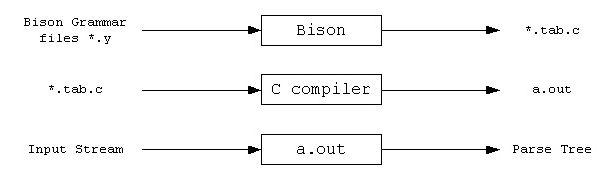


Below is a bison program of a simple calculator 




In [ ]:
%{
#include <stdio.h>
%}

/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%

calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;

exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;

factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;

term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}

yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

**LEX**

Lex is a computer program that generates lexical analyzers and was written by Mike Lesk and Eric Schmidt. Lex reads an input stream specifying the lexical analyzer and outputs source code implementing the lex in the C programming language.

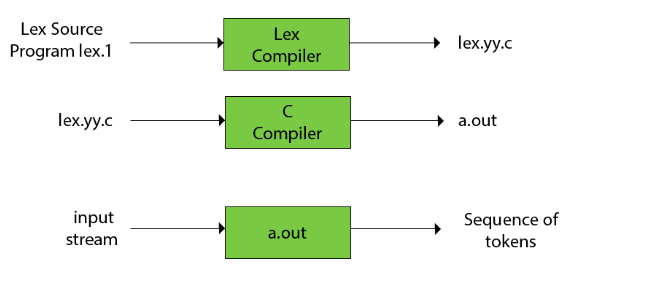

Lex code for password validation

In [ ]:
%{ 
    #include<stdio.h> 
    #include<string.h> 
    int a = 0, b=0, c=0, d=0, l=0; 
%} 
    
  
%% 
[a-z]    {a++;l++;}
[A-Z]    {b++;l++;}
[0-9]    {c++;l++;}
[$&+, :;=?@#|'<>.-^*()%!] {d++;l++;}
.  ;
%% 
    
int yywrap(void){} 
    
int main() 
{    
    // The function that starts the analysis 
    yylex(); 
      if(a>0 && b>0 && c>0 && d>0 && l>=8)
    printf("VALID\n");
    else
        printf("INVALID\n");
    return 0; 
} 

YACC

Yacc (for “yet another compiler compiler.”) is the standard parser generator for the Unix operating system. An open source program, yacc generates code for the parser in the C programming language. The acronym is usually rendered in lowercase but is occasionally seen as YACC or Yacc.

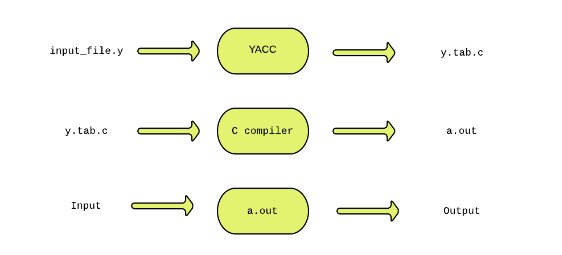


Below is YACC code to implement a calculator

In [ ]:
%{
   /* Definition section */
  #include<stdio.h>
  #include "y.tab.h"
  extern int yylval;
%}
  
/* Rule Section */
%%
[0-9]+ {
          yylval=atoi(yytext);
          return NUMBER;
  
       }
[\t] ;
  
[\n] return 0;
  
. return yytext[0];
  
%%
  
int yywrap()
{
 return 1;
}

References

*   https://silcnitc.github.io/yacc.html
*   https://www.geeksforgeeks.org/lex-code-for-password-validation/#:~:text=Lex%20is%20a%20computer%20program,in%20the%20C%20programming%20language.


*   https://www.javatpoint.com/lex

*   http://alumni.cs.ucr.edu/~lgao/teaching/bison.html


*   https://www.oreilly.com/library/view/flex-bison/9780596805418/ch01.html
